In [32]:
import os
import re


import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [33]:
# Define colors for modes
from scipy.ndimage import gaussian_filter1d
import pandas as pd
import seaborn as sns

MODE_COLORS = {"hard": "blue", "soft": "red", "Weady et al.": "black"}
LINE_STYLES = {"$\\lambda = 10^{-2}$": "solid",
               "$\\lambda = 10^{-3}$": "dashed", "$\\lambda = 10^{-4}$": "dotted"}

In [34]:
from load_combined import load_combined

source_folders = [
    "../data/hybrid2/",
 
]

# find recursive subfolders within source_folders
sim_dirs = []
for folder in source_folders:
    for root, dirs, files in os.walk(folder):
        # skip if /data as last part of path
        if "logs" in root or "data" in root.split(os.sep)[-1]:
            continue

        if any(f.endswith(".pvtu") for f in os.listdir(root)):
            sim_dirs.append(os.path.join(root))

particles_dict, sim_dict, params_dict = load_combined(sim_dirs, offset=0)

loading ../data/hybrid2/vtk_output_hard/1/1
loading ../data/hybrid2/vtk_output_hard/1/64
loading ../data/hybrid2/vtk_output_hard/1/4
loading ../data/hybrid2/vtk_output_hard/1/128
loading ../data/hybrid2/vtk_output_hard/1/16
loading ../data/hybrid2/vtk_output_hard/1/8
loading ../data/hybrid2/vtk_output_hard/1/32
loading ../data/hybrid2/vtk_output_hard/1/2
loading ../data/hybrid2/vtk_output_hard/64/2
loading ../data/hybrid2/vtk_output_hard/4/4
loading ../data/hybrid2/vtk_output_hard/4/16
loading ../data/hybrid2/vtk_output_hard/4/8
loading ../data/hybrid2/vtk_output_hard/4/32
loading ../data/hybrid2/vtk_output_hard/16/4
loading ../data/hybrid2/vtk_output_hard/16/8
loading ../data/hybrid2/vtk_output_hard/16/2
loading ../data/hybrid2/vtk_output_hard/8/4
loading ../data/hybrid2/vtk_output_hard/8/16
loading ../data/hybrid2/vtk_output_hard/8/8
loading ../data/hybrid2/vtk_output_hard/8/2
loading ../data/hybrid2/vtk_output_hard/32/4
loading ../data/hybrid2/vtk_output_hard/32/2
loading ../data/hy

In [35]:
sim_dict

,iteration,simulation_time_s,time_since_last_log_s,step,num_particles,num_constraints,colony_radius,recursive_iterations,bbpgd_iterations,max_overlap,...,load_imbalance,dt_s,x,y,z,rank,Mode,Sensitivity,sim_dir,offset
0,0,0.01000,0.002805,0,1,0,0.25500,1,10,0.000000e+00,...,4.00000,0.009905,NaN,NaN,NaN,0,hard,../data/hybrid2/vtk_output_hard/1/1assumed $\l...,.._data_hybrid2_vtk_output_hard,0
1,1,2.42760,8.389340,8177,8,14,5.25507,1,10,4.791860e-07,...,4.00000,0.000229,NaN,NaN,NaN,0,hard,../data/hybrid2/vtk_output_hard/1/1assumed $\l...,.._data_hybrid2_vtk_output_hard,0
2,0,0.01000,0.012790,0,1,0,0.25500,1,10,0.000000e+00,...,64.00000,0.009905,NaN,NaN,NaN,0,hard,../data/hybrid2/vtk_output_hard/1/64assumed $\...,.._data_hybrid2_vtk_output_hard,0
3,1,2.41663,22.477300,8102,8,14,5.25503,1,10,1.515590e-07,...,64.00000,0.000209,NaN,NaN,NaN,0,hard,../data/hybrid2/vtk_output_hard/1/64assumed $\...,.._data_hybrid2_vtk_output_hard,0
4,2,6.06941,83.582100,23003,256,2510,10.25520,3,60,2.073180e-04,...,53.25000,0.000186,NaN,NaN,NaN,0,hard,../data/hybrid2/vtk_output_hard/1/64assumed $\...,.._data_hybrid2_vtk_output_hard,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,18,11.60620,275.118000,48116,35901,568967,90.30390,5,860,6.189470e-04,...,1.22916,0.000383,NaN,NaN,NaN,0,hard,../data/hybrid2/vtk_output_hard/2/32assumed $\...,.._data_hybrid2_vtk_output_hard,0
468,19,11.78150,302.143000,48589,39236,725994,95.31180,6,880,6.933490e-04,...,1.21358,0.000377,NaN,NaN,NaN,0,hard,../data/hybrid2/vtk_output_hard/2/32assumed $\...,.._data_hybrid2_vtk_output_hard,0
469,20,11.95000,321.700000,49042,43975,812696,100.00200,6,760,7.242900e-04,...,1.21378,0.000355,NaN,NaN,NaN,0,hard,../data/hybrid2/vtk_output_hard/2/32assumed $\...,.._data_hybrid2_vtk_output_hard,0
470,0,0.01000,0.002805,0,1,0,0.25500,1,10,0.000000e+00,...,4.00000,0.009905,NaN,NaN,NaN,0,hard,../data/hybrid2/vtk_output_hard/2/2assumed $\l...,.._data_hybrid2_vtk_output_hard,0


In [36]:
# print sizte of particles_dict in MB
print(f"Loaded particles_dict with {particles_dict.memory_usage(deep=True).sum() / (1024**2):.2f} MB")
print(f"Loaded sim_dict with {sim_dict.memory_usage(deep=True).sum() / (1024**2):.2f} MB")
print(f"Loaded params_dict with {params_dict.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

Loaded particles_dict with 391.28 MB
Loaded sim_dict with 0.19 MB
Loaded params_dict with 0.01 MB


In [37]:
sim_dict.keys()

Index(['iteration', 'simulation_time_s', 'time_since_last_log_s', 'step',
       'num_particles', 'num_constraints', 'colony_radius',
       'recursive_iterations', 'bbpgd_iterations', 'max_overlap', 'residual',
       'memory_usage_mb', 'peak_memory_mb', 'cpu_time_s', 'mpi_comm_time_s',
       'load_imbalance', 'dt_s', 'x', 'y', 'z', 'rank', 'Mode', 'Sensitivity',
       'sim_dir', 'offset'],
      dtype='object')

In [38]:
particles_dict["sim_dir"]

0         .._data_hybrid2_vtk_output_hard
1         .._data_hybrid2_vtk_output_hard
2         .._data_hybrid2_vtk_output_hard
3         .._data_hybrid2_vtk_output_hard
4         .._data_hybrid2_vtk_output_hard
                       ...               
860545    .._data_hybrid2_vtk_output_hard
860546    .._data_hybrid2_vtk_output_hard
860547    .._data_hybrid2_vtk_output_hard
860548    .._data_hybrid2_vtk_output_hard
860549    .._data_hybrid2_vtk_output_hard
Name: sim_dir, Length: 860550, dtype: object

In [39]:
particles_dict[["thread", "processes"]
               ] = particles_dict["Sensitivity"].str.extract(r"/(\d+)/(\d+)assumed")

In [40]:
sim_dict[["thread", "processes"]
               ] = sim_dict["Sensitivity"].str.extract(r"/(\d+)/(\d+)assumed")

In [41]:
from scipy.optimize import curve_fit

runtimes = []
for k, g in sim_dict.groupby(["Mode", "thread", "processes", "Sensitivity"]):

    final_time = g["cpu_time_s"].max()
    final_radius = g["colony_radius"].max()

    if final_radius < 100:
        print(f"Skipping {k} with final radius {final_radius:.2f} < 100")
        continue

    runtimes.append(pd.DataFrame({
        "runtime [min]": [final_time / 60],
        "Mode": [k[0]],
        "threads": [int(k[1])],
        "processes": [int(k[2])],
        "Sensitivity": [k[3]],
        "colony_radius": [final_radius],
    }))
runtimes = pd.concat(runtimes, ignore_index=True)

runtimes

Skipping ('hard', '1', '1', '../data/hybrid2/vtk_output_hard/1/1assumed $\\lambda = 10^{-2}$') with final radius 5.26 < 100
Skipping ('hard', '1', '2', '../data/hybrid2/vtk_output_hard/1/2assumed $\\lambda = 10^{-2}$') with final radius 5.26 < 100
Skipping ('hard', '1', '4', '../data/hybrid2/vtk_output_hard/1/4assumed $\\lambda = 10^{-2}$') with final radius 75.29 < 100
Skipping ('hard', '16', '2', '../data/hybrid2/vtk_output_hard/16/2assumed $\\lambda = 10^{-2}$') with final radius 75.29 < 100
Skipping ('hard', '16', '8', '../data/hybrid2/vtk_output_hard/16/8assumed $\\lambda = 10^{-2}$') with final radius 65.27 < 100
Skipping ('hard', '2', '1', '../data/hybrid2/vtk_output_hard/2/1assumed $\\lambda = 10^{-2}$') with final radius 5.26 < 100
Skipping ('hard', '2', '2', '../data/hybrid2/vtk_output_hard/2/2assumed $\\lambda = 10^{-2}$') with final radius 5.26 < 100
Skipping ('hard', '2', '4', '../data/hybrid2/vtk_output_hard/2/4assumed $\\lambda = 10^{-2}$') with final radius 75.29 < 100


,runtime [min],Mode,threads,processes,Sensitivity,colony_radius
0,67.849833,hard,1,128,../data/hybrid2/vtk_output_hard/1/128assumed $...,100.006
1,68.789500,hard,1,16,../data/hybrid2/vtk_output_hard/1/16assumed $\...,100.005
2,48.083167,hard,1,32,../data/hybrid2/vtk_output_hard/1/32assumed $\...,100.003
3,43.457333,hard,1,64,../data/hybrid2/vtk_output_hard/1/64assumed $\...,100.007
4,110.430833,hard,1,8,../data/hybrid2/vtk_output_hard/1/8assumed $\l...,100.013
5,191.831667,hard,16,4,../data/hybrid2/vtk_output_hard/16/4assumed $\...,100.004
6,69.545500,hard,2,16,../data/hybrid2/vtk_output_hard/2/16assumed $\...,100.010
7,50.098333,hard,2,32,../data/hybrid2/vtk_output_hard/2/32assumed $\...,100.002
8,43.562667,hard,2,64,../data/hybrid2/vtk_output_hard/2/64assumed $\...,100.007
9,110.212333,hard,2,8,../data/hybrid2/vtk_output_hard/2/8assumed $\l...,100.012


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def makegrid(data, x, y, value, xlabel=None, ylabel=None, outname=None,
             cmap="viridis_r", fmt=".1f", **kwargs):
    """
    Plot a 2D grid (heatmap) of a value across x and y axes,
    with the x-axis (e.g., MPI processes) displayed at the top.
    """
    pivot = data.pivot_table(index=y, columns=x, values=value, aggfunc="mean")
    outname = outname or f"{value}_grid.png"

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(
        pivot,
        annot=True,
        fmt=fmt,
        cmap=cmap,
        cbar_kws={"label": value},
        linewidths=0.5,
        linecolor="gray",
        ax=ax,
        **kwargs
    )

    # Move the x-axis (MPI processes) to the top
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    ax.set_xlabel(xlabel or x, fontsize=20, labelpad=10)
    ax.set_ylabel(ylabel or y, fontsize=20)
    ax.tick_params(axis='x', labelsize=16, rotation=0)
    ax.tick_params(axis='y', labelsize=16, rotation=0)
    ax.grid(False)

    fig.tight_layout()
    fig.savefig(outname, dpi=300, bbox_inches="tight")


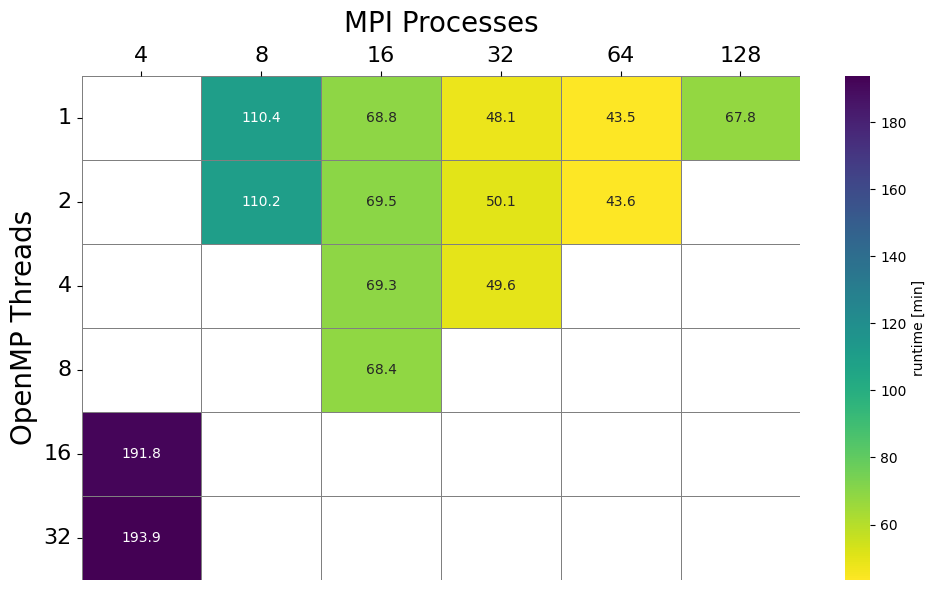

In [43]:
makegrid(
    data=runtimes,
    x="processes",
    y="threads",
    value="runtime [min]",
    xlabel="MPI Processes",
    ylabel="OpenMP Threads",
    cmap="viridis_r"
)

In [44]:
def makeplot(data, x, y, xlabel=None, ylabel=None, outname=None, variable="density",
             xscale=None, yscale=None,             **kwargs):

    fig, ax = plt.subplots(figsize=(10, 6))
    outname = outname or f"{y}_vs_{x}.png"

    sns.lineplot(data, x=x,                 y=y,
                 marker="o", ax=ax, **kwargs, lw=2, ms=10, palette="tab10"
                 )

    if xscale:
        ax.set_xscale(xscale, base=2)
    if yscale:
        ax.set_yscale(yscale, base=2)

    ax.set_xlabel(xlabel or x, fontsize=20)
    ax.set_ylabel(ylabel or y, fontsize=20)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.grid(True)
    ax.legend(fontsize=22)

    if outname:
        fig.savefig(outname, dpi=300, bbox_inches="tight")

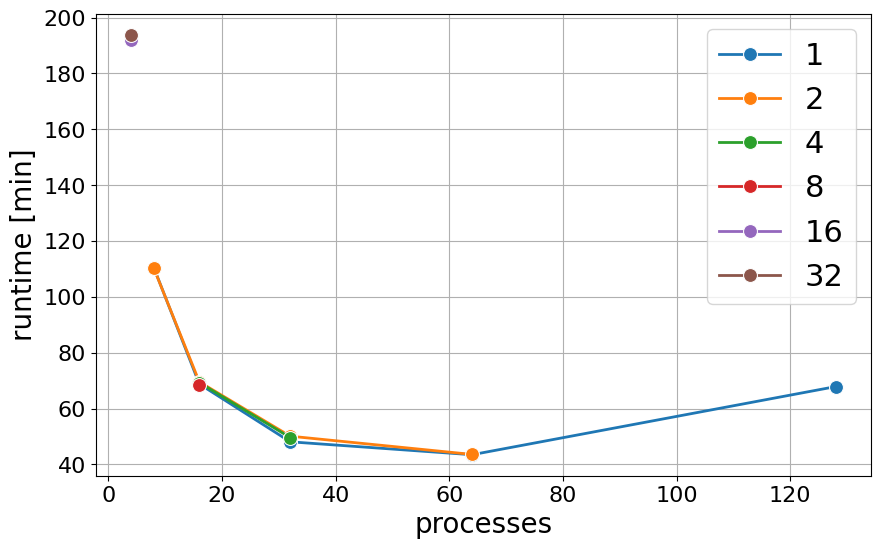

In [45]:
makeplot(runtimes, x="processes", y="runtime [min]", hue="threads")